In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df_train = pd.read_csv('../data/raw/fetal_health.csv')

In [9]:
#check columns
df_train.columns.tolist()

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

In [8]:
df_train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [25]:
def check_df(dataframe, head=5, tail = 5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head ######################")
    print(dataframe.head(head))
    print("##################### Tail ######################")
    print(dataframe.tail(tail))
    print("##################### NA ########################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [26]:
check_df(df_train)

##################### Shape #####################
(2126, 22)
##################### Types #####################
baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                  

In [27]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.
    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                Class threshold for numeric but categorical variables
        car_th: int, optinal
                Class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical view cardinal variable list
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of 3 lists with return is equal to the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [29]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_train)

Observations: 2126
Variables: 22
cat_cols: 5
num_cols: 17
cat_but_car: 0
num_but_cat: 5


In [31]:
df_train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000
mean_value_of_long_term_variability,2126.0,8.187629,5.628247,0.0,4.600,7.400,10.800,50.700
histogram_width,2126.0,70.445908,38.955693,3.0,37.000,67.500,100.000,180.000


In [32]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

     fetal_health      Ratio
1.0          1655  77.845720
2.0           295  13.875823
3.0           176   8.278457
##########################################


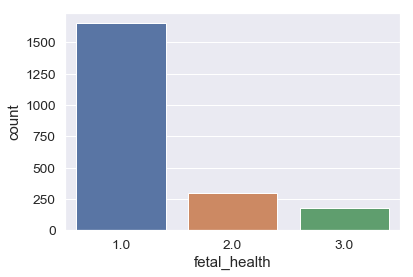

In [33]:
cat_summary(df_train, "fetal_health", True)
#The number of healthy fetuses outnumbers unhealthy 

The dataset is unbalanced.

In [36]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=10)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


In [81]:
num_cols_reduce = ['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations']
df_reduce = df_train.loc[:,num_cols_reduce].copy()

In [63]:
num_cols

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance']

                                                     count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks             

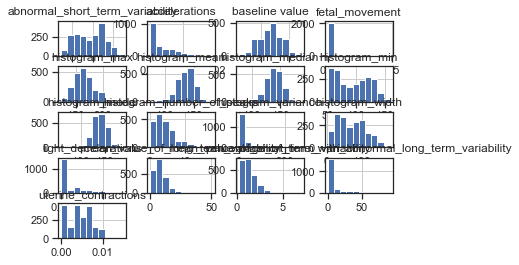

In [66]:
num_summary(df_train,num_cols, True)

In [38]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df_train, "fetal_health", col)

#baseline value mean is nearly the same for 1.0 and 3.0 
#accelerations is higher for 1.0
#fetal movement is lower for 1.0 
#contractions slightly higher for 1.0 
#light decelerations lowest for 2.0 
#abnormal short term variablity lowest for 1.0 
#mean short term variability lowest for 2.0 
#percentage of time with abnormal long term variability lowest for 1.0, highest for 2.0 
#mean value of long term variability lowest for 3.0 
#histogram width is greatest for 3.0, greater variability 

              baseline value
fetal_health                
1.0               131.981873
2.0               141.684746
3.0               131.687500


              accelerations
fetal_health               
1.0                0.003992
2.0                0.000275
3.0                0.000392


              fetal_movement
fetal_health                
1.0                 0.007963
2.0                 0.008332
3.0                 0.025676


              uterine_contractions
fetal_health                      
1.0                       0.004781
2.0                       0.002390
3.0                       0.003784


              light_decelerations
fetal_health                     
1.0                      0.001941
2.0                      0.000536
3.0                      0.003670


              abnormal_short_term_variability
fetal_health                                 
1.0                                 42.465861
2.0                                 61.901695
3.0                            

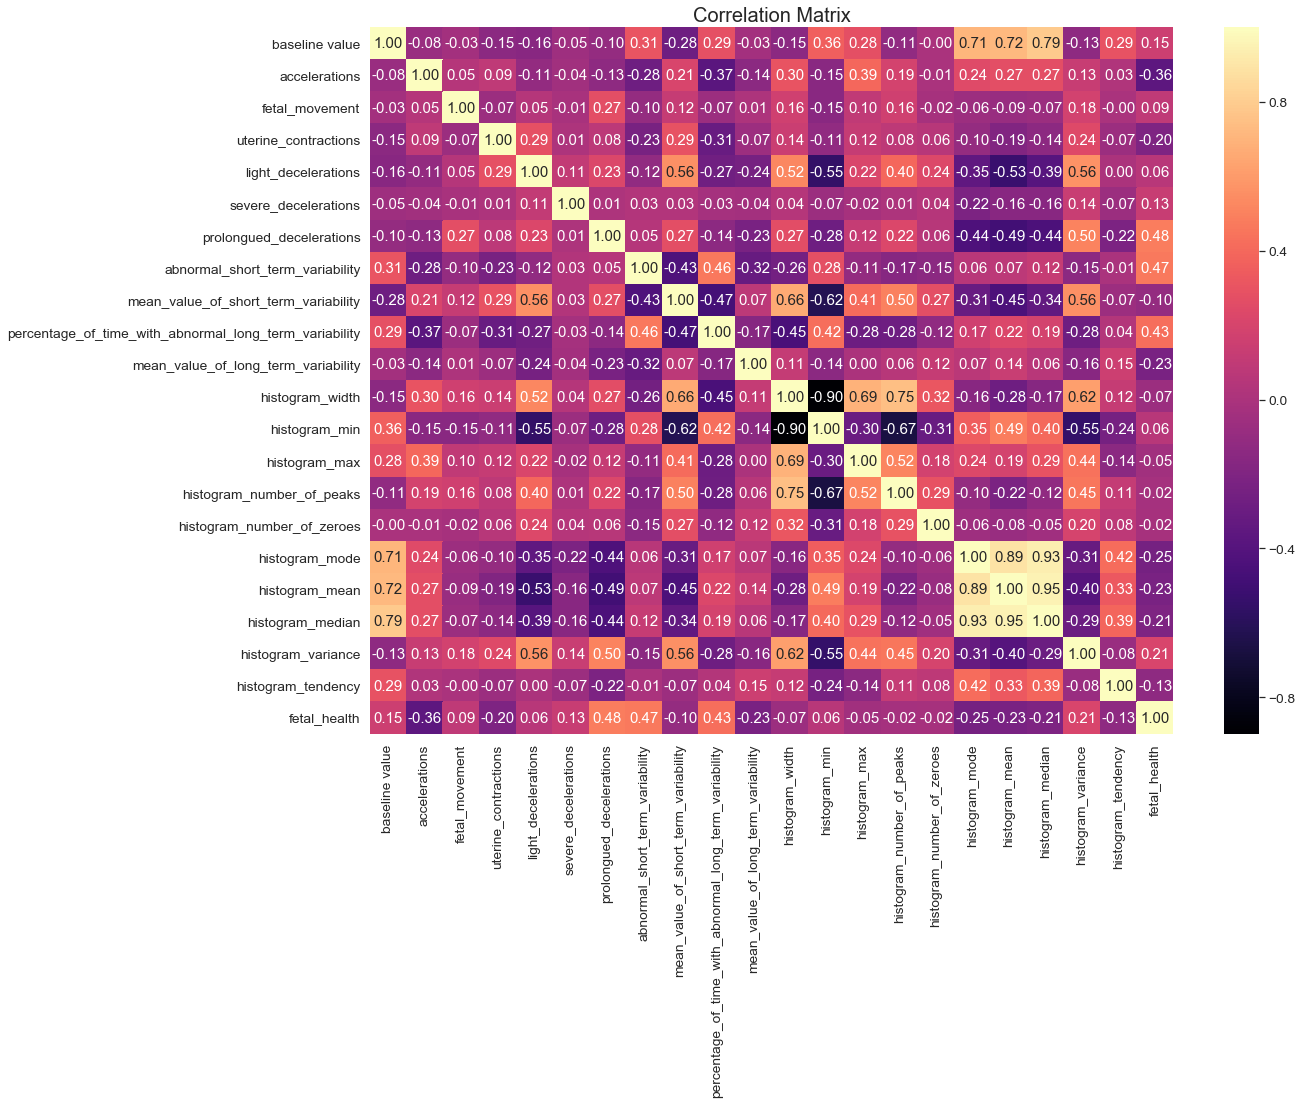

In [40]:
df_train.corr()

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


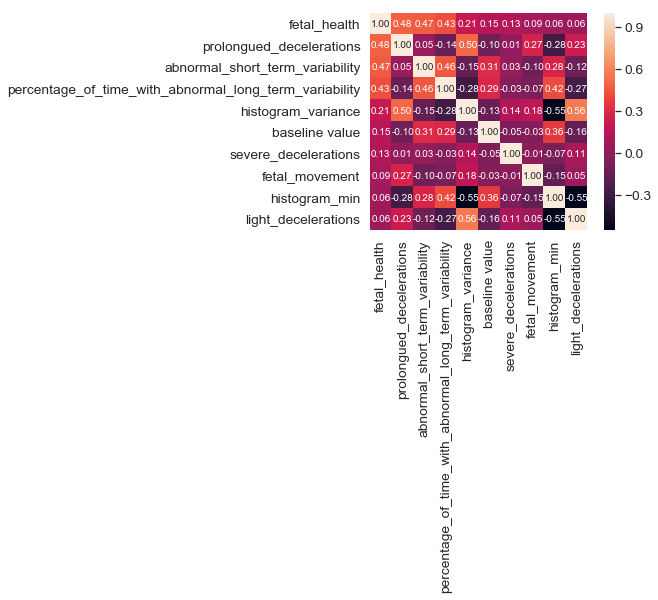

In [11]:
#fetal health correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'fetal_health')['fetal_health'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#Greatest correlations: prolongued decel., abnormal short term variability, percentage of time with abnormal

In [95]:
df_train.corr().style.background_gradient()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1,-0.0805597,-0.0334365,-0.146373,-0.159032,-0.0535175,-0.104597,0.30557,-0.279607,0.28563,-0.032091,-0.147679,0.361619,0.27511,-0.113933,-0.00474458,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.0805597,1,0.0482346,0.0896742,-0.108615,-0.0430181,-0.127749,-0.279577,0.20717,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.00614657,0.24361,0.270334,0.272849,0.125704,0.0284198,-0.364066
fetal_movement,-0.0334365,0.0482346,1,-0.0687787,0.0492285,-0.0109756,0.265922,-0.103715,0.121314,-0.0740955,0.0110474,0.16279,-0.153917,0.0998526,0.164654,-0.0177492,-0.0611924,-0.0896712,-0.0723295,0.17934,-0.0015414,0.08801
uterine_contractions,-0.146373,0.0896742,-0.0687787,1,0.285079,0.00678828,0.0770361,-0.232811,0.289679,-0.306608,-0.0660582,0.142541,-0.113323,0.122766,0.082693,0.0578945,-0.104854,-0.187505,-0.140287,0.238582,-0.0723136,-0.204894
light_decelerations,-0.159032,-0.108615,0.0492285,0.285079,1,0.107573,0.225611,-0.119152,0.56217,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.39762,0.235296,-0.347233,-0.527354,-0.388586,0.564289,7.1613e-05,0.0588705
severe_decelerations,-0.0535175,-0.0430181,-0.0109756,0.00678828,0.107573,1,0.0123954,0.0339486,0.0341299,-0.0307702,-0.0376669,0.0448796,-0.0719738,-0.0211348,0.00702426,0.0434414,-0.215161,-0.158673,-0.160451,0.136421,-0.0704831,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.0770361,0.225611,0.0123954,1,0.0462257,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.22286,0.0564232,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.30557,-0.279577,-0.103715,-0.232811,-0.119152,0.0339486,0.0462257,1,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.0583631,0.0745537,0.11996,-0.146434,-0.00574792,0.471191
mean_value_of_short_term_variability,-0.279607,0.20717,0.121314,0.289679,0.56217,0.0341299,0.267011,-0.430705,1,-0.470259,0.0738918,0.660847,-0.622569,0.409072,0.50143,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.0661397,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.28563,-0.373943,-0.0740955,-0.306608,-0.271282,-0.0307702,-0.137333,0.459413,-0.470259,1,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.18648,-0.281536,0.0424812,0.426146


In [67]:
# def pairplot(dataset, target_column):
#     sns.set(style="ticks")
#     sns.pairplot(dataset, hue=target_column)
#     plt.show()


# df_reduce = df_train.loc[:,['baseline value',
#  'accelerations',
#  'fetal_movement','fetal_health']].copy()

# sns.pairplot(df_reduce, 'fetal_health')

In [42]:
normal= df_train[(df_train['fetal_health'] == 1)]
suspect= df_train[(df_train['fetal_health'] == 2)]
pathological= df_train[(df_train['fetal_health'] == 3)]

prolongued_decelerations

prolongued_decelerations


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88570d92e8>,
      dtype=object)

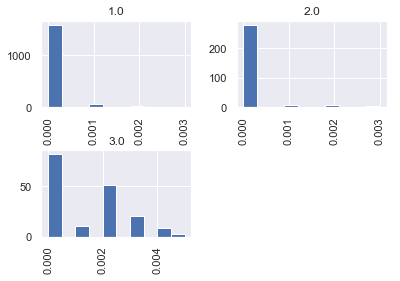

In [93]:
df_train.hist(column='prolongued_decelerations', by='fetal_health') 

accelerations


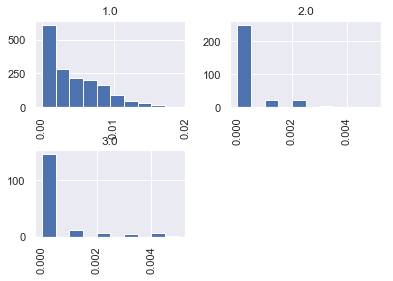

In [91]:
print('accelerations')
df_train.hist(column='accelerations', by='fetal_health');


uterine contractions


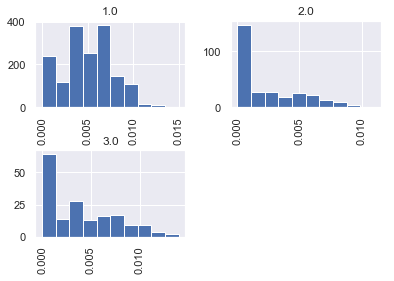

In [92]:
print('uterine contractions')
df_train.hist(column='uterine_contractions', by='fetal_health');

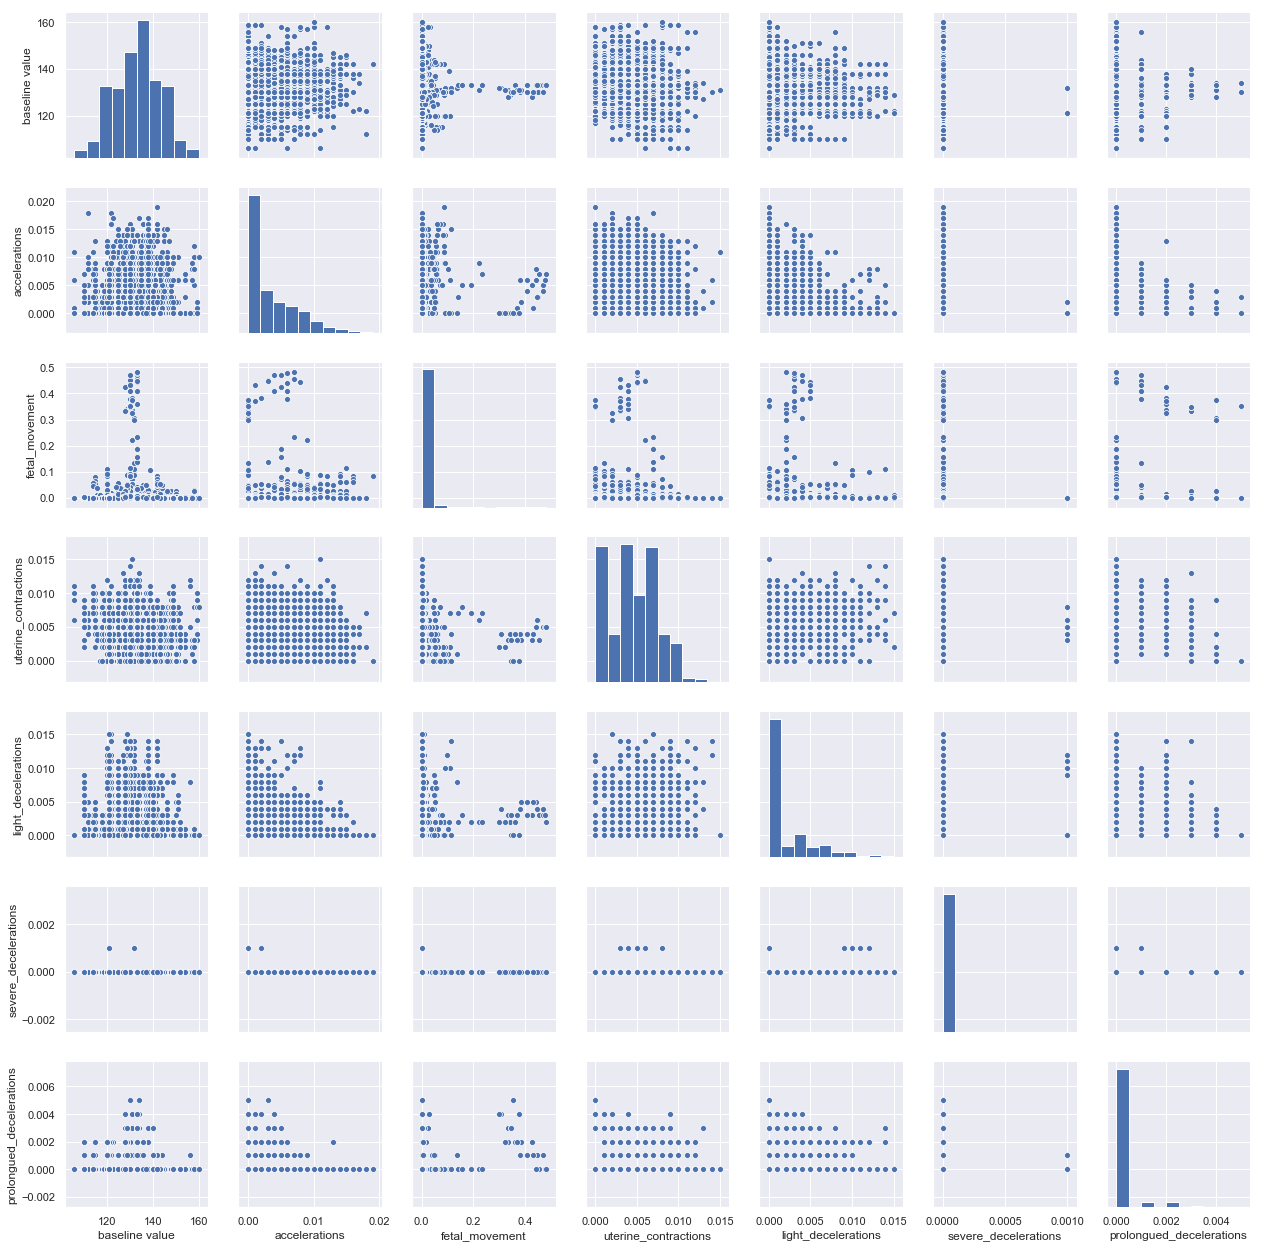

In [82]:
#scatterplot
sns.set()
sns.pairplot(df_reduce[num_cols_reduce])
plt.show();

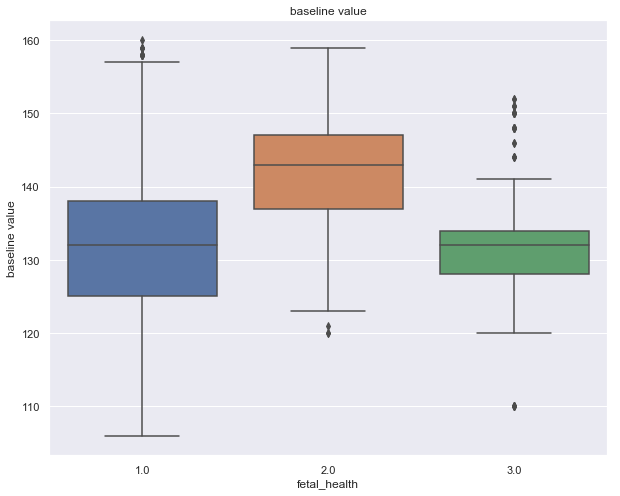

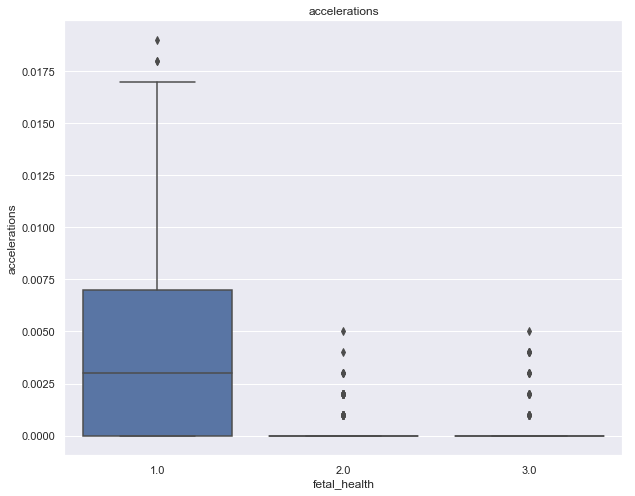

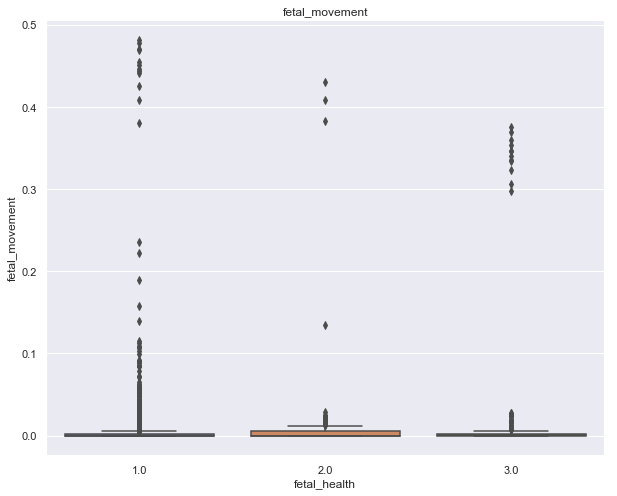

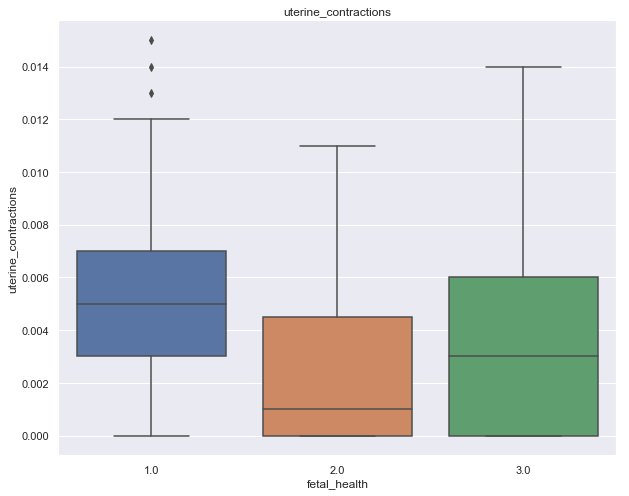

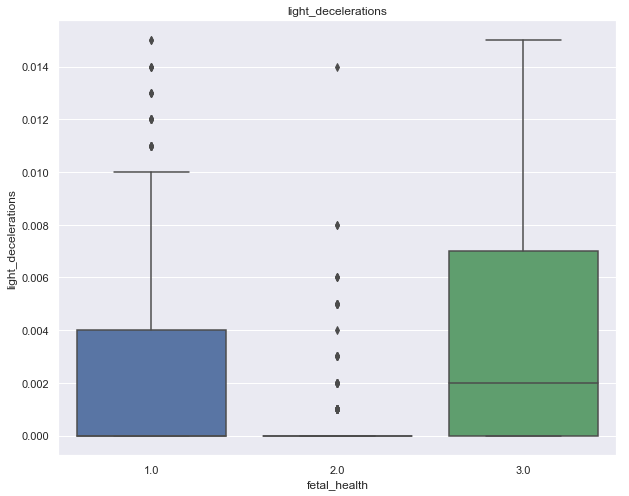

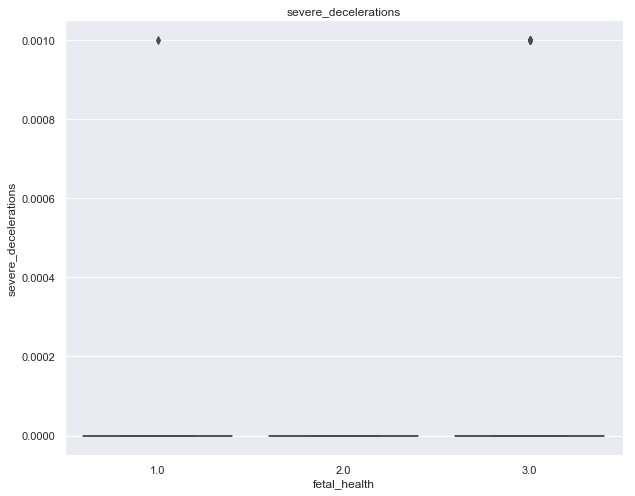

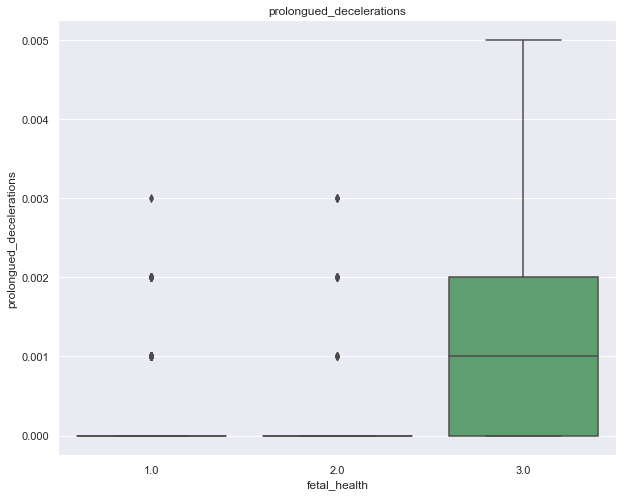

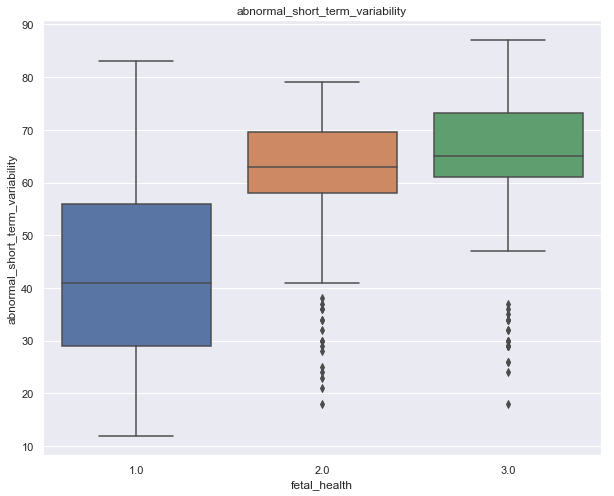

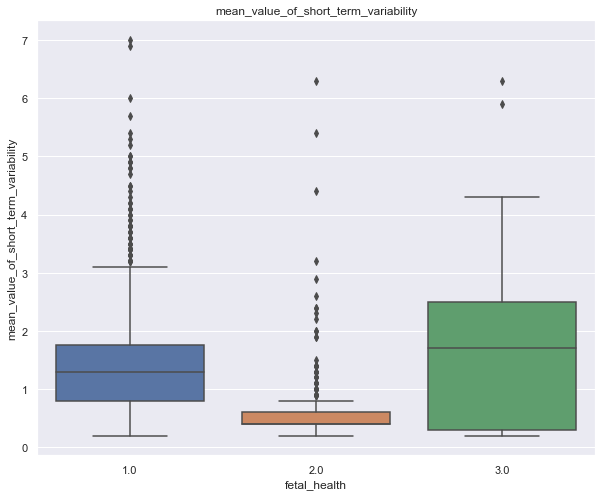

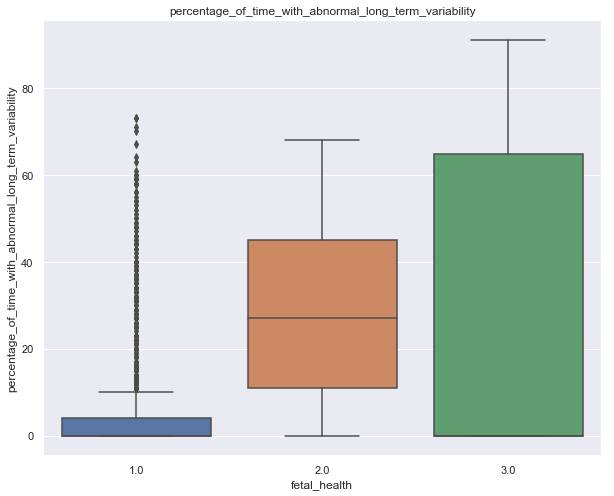

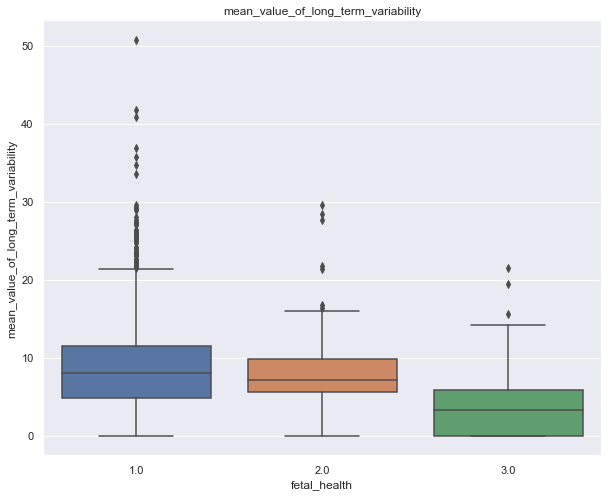

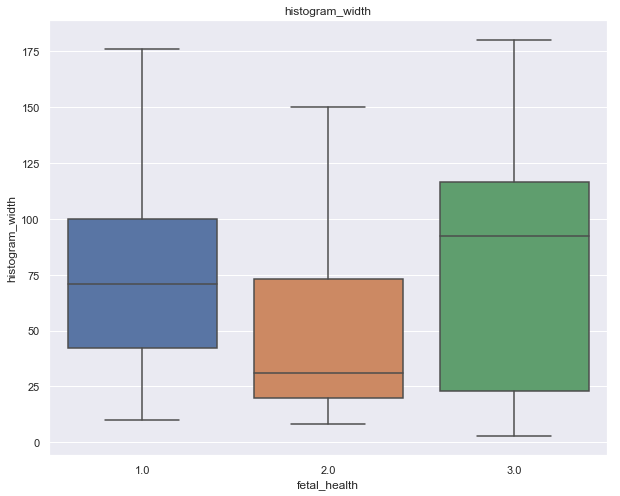

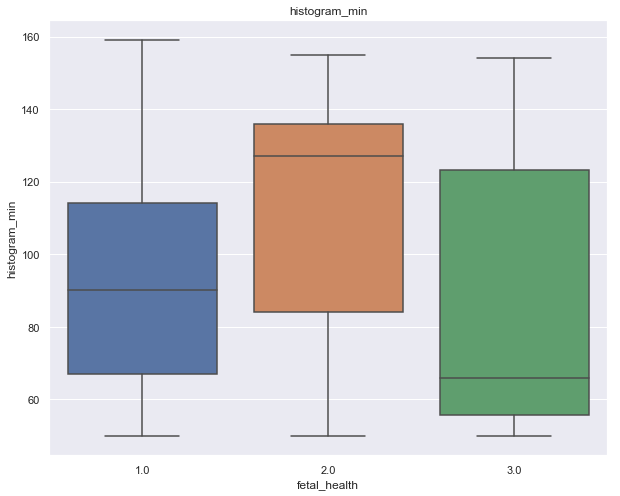

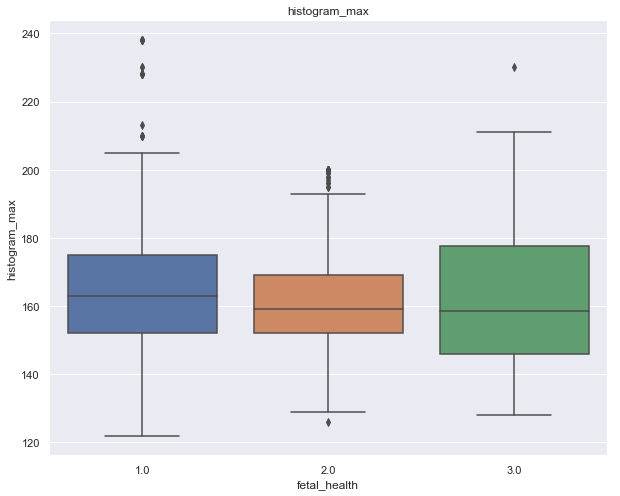

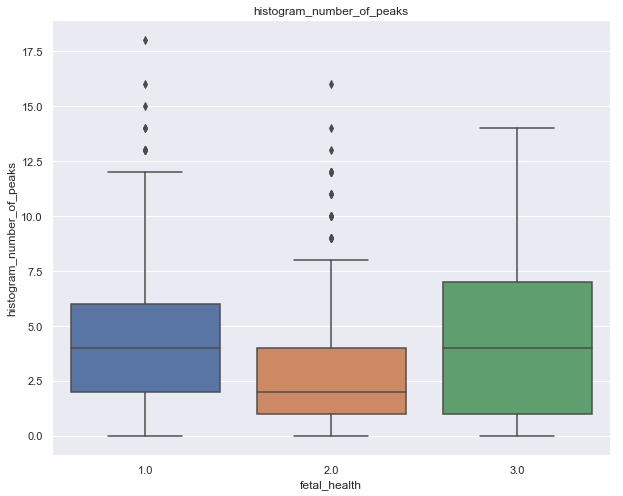

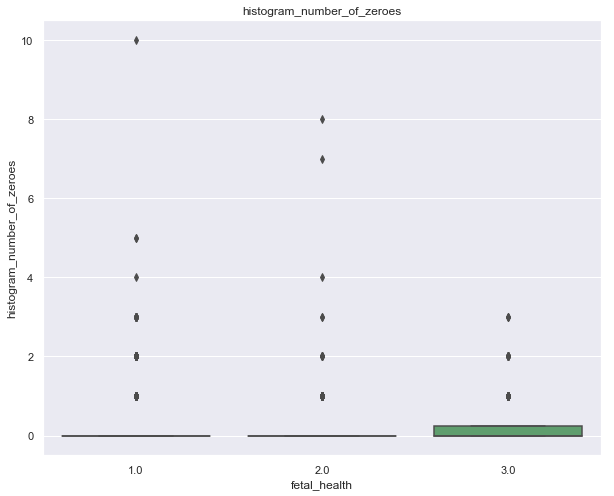

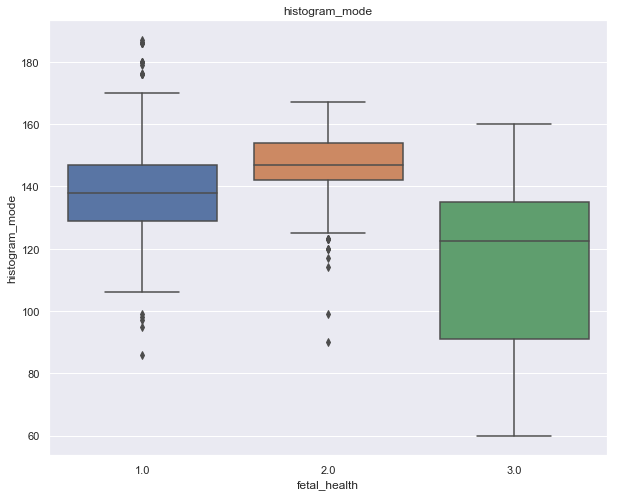

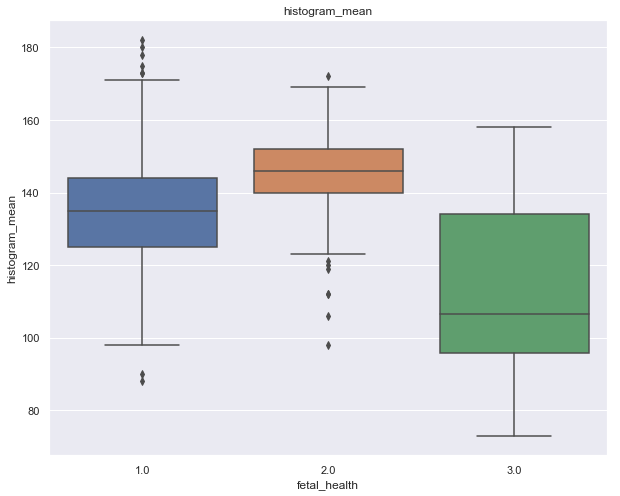

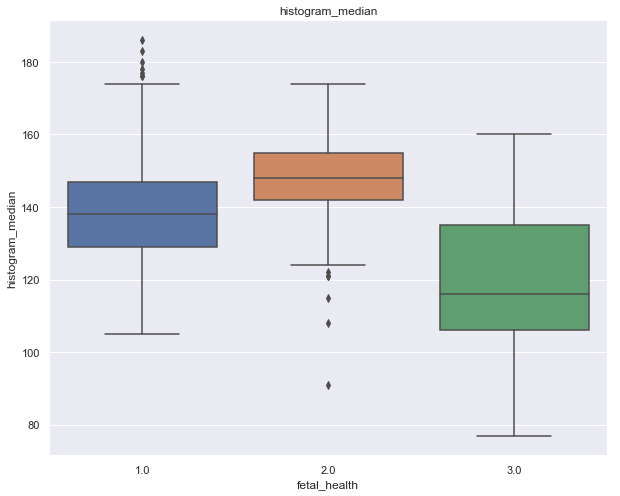

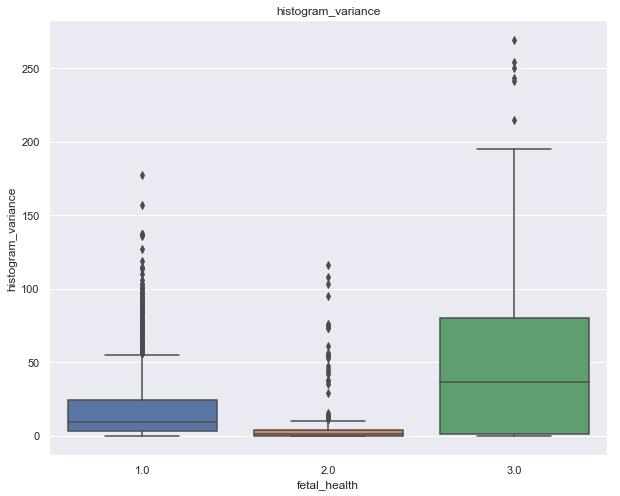

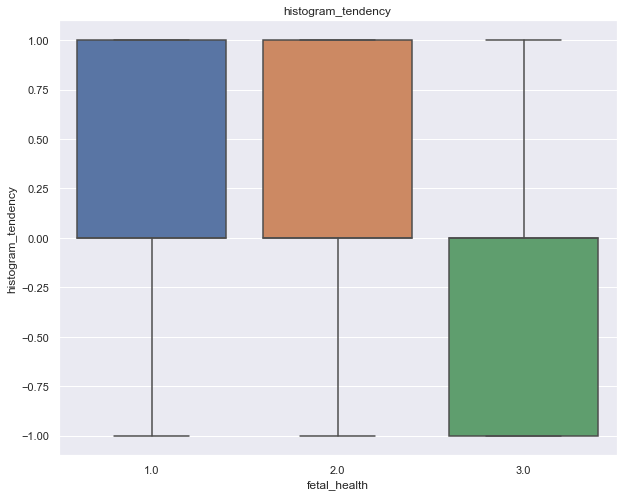

In [96]:
for col in df_train.columns:
    if col != 'fetal_health':
        plt.figure(figsize=(10,8))
        plt.title(col)
        sns.boxplot(x = 'fetal_health',y = col,data = df_train)
        plt.show()
    else: 
        pass

In [12]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#no missing data! 

,Total,Percent
fetal_health,0,0.0
histogram_tendency,0,0.0
accelerations,0,0.0
fetal_movement,0,0.0
uterine_contractions,0,0.0
light_decelerations,0,0.0
severe_decelerations,0,0.0
prolongued_decelerations,0,0.0
abnormal_short_term_variability,0,0.0
mean_value_of_short_term_variability,0,0.0
